# Validations pour le perceptron simple
## Porte logique ET

In [14]:
from perceptron import PerceptronSimple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import data_processing

perceptron = PerceptronSimple(input_size=2, learning_rate=0.3, epochs=1000)
# Mise à zéro des poids pour suivre facilement le comportement
perceptron.weights = [0,0,0]
# Chargement des donnés
df = data_processing.load_dataframe_from_file("../datasets/table_2_1.csv")
print(df)

history = perceptron.train(df)

      inputs  label
0  [1, 0, 0]      0
1  [1, 0, 1]      0
2  [1, 1, 0]      0
3  [1, 1, 1]      1
Training complete for 6 epochs


Une fois l'entrainement terminé, on peut observer qu'il se comporte bien comme la porte logique ET:

In [16]:
for _, row in df.iterrows():
    print(f"Cas {row["inputs"][1:]} : {perceptron.predict(row["inputs"])}")

Cas [0 0] : 0
Cas [0 1] : 0
Cas [1 0] : 0
Cas [1 1] : 1


Cela semble bien se comporter.
Regardons dès à présent les graphiques de son évolution:

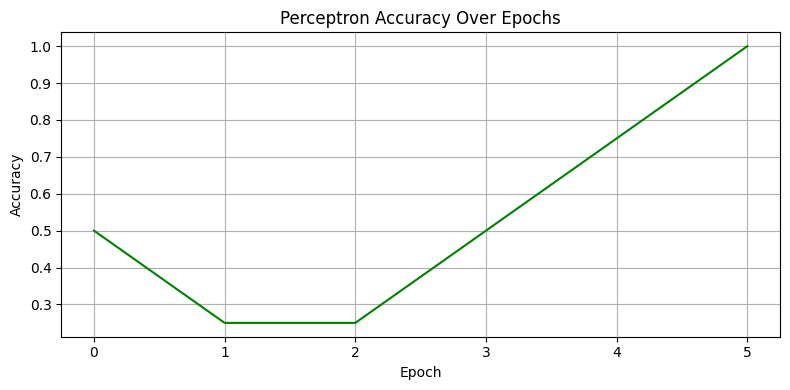

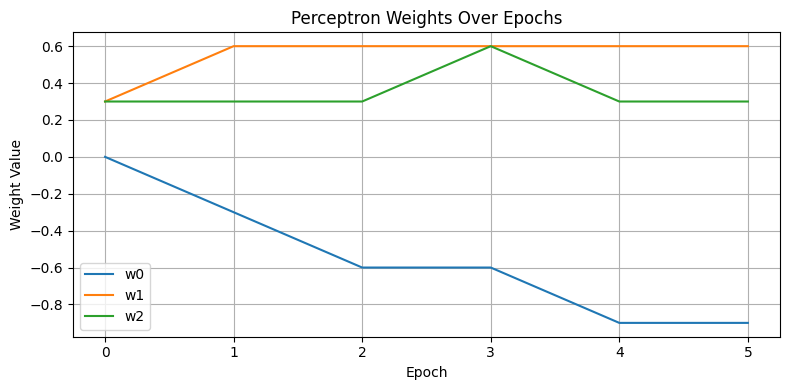

In [18]:
training = history.df

# Évolution de l'entrainement
plt.figure(figsize=(8, 4))
plt.plot(training['epoch'], training['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Perceptron Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

weights_df = pd.DataFrame(training["weights"].to_list(), columns=[f"w{i}" for i in range(len(training['weights'].iloc[0]))])
weights_df["epoch"] = training["epoch"]
plt.figure(figsize=(8, 4))
for col in weights_df.columns:
    if col != "epoch":
        plt.plot(weights_df["epoch"], weights_df[col], label=col)

plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title("Perceptron Weights Over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

On voit bien que la précision augmente au fur et à mesure que les poids sont ajustés.

Un autre graphique intéressant, est celui de la droite de décision:

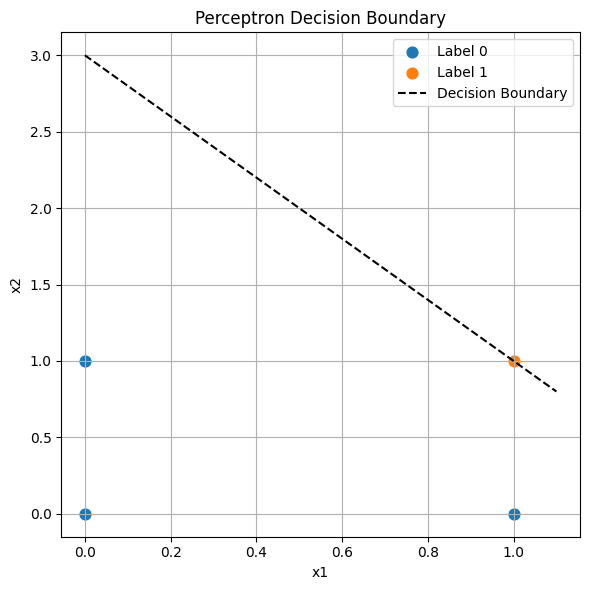

In [22]:
final_weights = perceptron.weights
bias = final_weights[0]
w1 = final_weights[1]
w2 = final_weights[2]
X = np.array([inp[1:] for inp in df["inputs"]])
y = df["label"].values
plt.figure(figsize=(6, 6))
for label in np.unique(y):
    points = X[y == label]
    plt.scatter(points[:, 0], points[:, 1], label=f"Label {label}", s=60)

# y = -(bias + w1*x) / w2
x_vals = np.linspace(0, 1.1, 100)
if w2 != 0:
    y_vals = -(bias + w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
else:
    x_intercept = -bias / w1 if w1 != 0 else 0
    plt.axvline(x=x_intercept, color='k', linestyle='--', label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


On observe que la ligne est **sur** le point (1,1), confirmant bien que le perceptron simple ne se généralise pas bien.